# NSDUH Tables

2023-2024 data from https://www.samhsa.gov/data/sites/default/files/reports/rpt56484/NSDUHDetailedTabs2024/NSDUHDetailedTabs2024/2024-nsduh-detailed-tables-sect1pe.htm

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import decorate

Code to download the HTML and pull out the tables is in `tables.py`

In [39]:
!ls data

2024-nsduh-detailed-tables-sect1pe.htm	table_1.2B.csv	 table_1.82A.csv
2024-nsduh-detailed-tables-sect5pe.htm	table_1.30A.csv  table_1.82B.csv
table_1.100A.csv			table_1.30B.csv  table_1.83A.csv
table_1.100B.csv			table_1.31A.csv  table_1.83B.csv
table_1.101A.csv			table_1.31B.csv  table_1.84A.csv
table_1.101B.csv			table_1.32A.csv  table_1.84B.csv
table_1.102A.csv			table_1.32B.csv  table_1.85A.csv
table_1.102B.csv			table_1.33A.csv  table_1.85B.csv
table_1.103A.csv			table_1.33B.csv  table_1.86A.csv
table_1.103B.csv			table_1.34A.csv  table_1.86B.csv
table_1.104A.csv			table_1.34B.csv  table_1.87A.csv
table_1.104B.csv			table_1.35A.csv  table_1.87B.csv
table_1.105A.csv			table_1.35B.csv  table_1.88A.csv
table_1.105B.csv			table_1.36A.csv  table_1.88B.csv
table_1.106A.csv			table_1.36B.csv  table_1.89A.csv
table_1.106B.csv			table_1.37A.csv  table_1.89B.csv
table_1.107A.csv			table_1.37B.csv  table_1.8A.csv
table_1.107B.csv			table_1.38A.csv  table_1.8B.csv
table_1.108A.csv			table_1.

In [4]:
number = '1.23B'
filename = f'table_{number}.csv'
filename

'table_1.23B.csv'

In [5]:
from tables import load_table_mappings

filename_to_title, filename_to_number = load_table_mappings()

We can get a lot of information by parsing the table title

In [6]:
from tables import parse_table_title

title = filename_to_title[filename]

table_info = parse_table_title(title)
table_info

{'table_number': '1.23B',
 'full_description': 'Illicit Drug Use in Lifetime: Among People Aged 12 or Older; by Age Group and Demographic Characteristics, Percentages, 2023 and 2024',
 'years': ('2023', '2024'),
 'measurement_type': 'Percentages',
 'time_period': 'Lifetime',
 'population': '12 or Older',
 'breakdown_variables': 'Age Group and Demographic Characteristics, Percentages,',
 'original_title': 'Table 1.23B - Illicit Drug Use in Lifetime: Among People Aged 12 or Older; by Age Group and Demographic Characteristics, Percentages, 2023 and 2024'}

This function loads a sequence tables, cleans and extracts the parts we want, and concats them into a big table.

In [7]:
from tables import clean_table, add_diffs

df = pd.read_csv(f"data/{filename}", index_col=0)
df = clean_table(df)
df.columns

Index(['Aged 12+ (2023)', 'Aged 12+ (2024)', 'Aged 12-17 (2023)',
       'Aged 12-17 (2024)', 'Aged 18+ (2023)', 'Aged 18+ (2024)',
       'Aged 18-25 (2023)', 'Aged 18-25 (2024)', 'Aged 26+ (2023)',
       'Aged 26+ (2024)'],
      dtype='object')

In [8]:
from tables import make_table

make_table(df)

In [10]:
from tables import clean_labels

drop = 'Prescription Tranquilizers or Prescription Sedatives'



def compile_tables(tables):
    table_dict = {}

    for table in tables:
        number = f'1.{table}B'
        filename = f'table_{number}.csv'
        title = filename_to_title[filename]
        table_info = parse_table_title(title)
        desc = table_info['full_description']
        key = desc.split(" in ")[0]
        
        df = pd.read_csv(f"data/{filename}", index_col=0)
        df = clean_table(df)
        table_dict[key] = make_table(df)
        print(number, table_info['time_period'], key)
        
    table = pd.concat(table_dict)
    return clean_labels(table).drop(drop, level=0, errors='ignore')

### Lifetime use

In [11]:
tables = range(23, 42, 3)
tables_lifetime = compile_tables(tables)

1.23B Lifetime Illicit Drug Use
1.26B Lifetime Marijuana Use
1.29B Lifetime Cocaine Use
1.32B Lifetime Crack Use
1.35B Lifetime Hallucinogen Use
1.38B Lifetime Inhalant Use
1.41B Lifetime Methamphetamine Use


In [12]:
tables_lifetime

Aged 12-17                    \
                                                     2023  2024 Change Diff   
                    Demographic Characteristic                                
Illicit Drug Use    Male                             18.9  23.0    4.1  NaN   
                    Female                           22.4  25.4    3.0  2.4   
Marijuana Use       Male                             11.7  11.8    0.1  NaN   
                    Female                           15.1  14.2   -0.9  2.4   
Cocaine Use         Male                              0.2   0.4    0.2  NaN   
                    Female                            0.4   0.4    0.0  0.0   
Crack Use           Male                              NaN   0.1    NaN  NaN   
                    Female                            NaN   0.1    NaN  0.0   
Hallucinogen Use    Male                              2.1   2.2    0.1  NaN   
                    Female                            1.9   2.4    0.5  0.2   
Inhalant Use        Male                              NaN  11.5    NaN  NaN   
                    Female                            NaN  12.3    NaN  0.8   
Methamphetamine Use Male                              0.2   0.3    0.1  NaN   
                    Female                            0.5   0.4   -0.1  0.1   

                                               Aged 18+                    
                                                   2023  2024 Change Diff  
                    Demographic Characteristic                             
Illicit Drug Use    Male                           58.1  57.8   -0.3  NaN  
                    Female                         50.7  51.9    1.2 -5.9  
Marijuana Use       Male                           53.9  53.9    0.0  NaN  
                    Female                         47.3  48.2    0.9 -5.7  
Cocaine Use         Male                           19.4  19.6    0.2  NaN  
                    Female                         13.5  12.9   -0.6 -6.7  
Crack Use           Male                            4.7   5.5    0.8  NaN  
                    Female                          3.0   2.7   -0.3 -2.8  
Hallucinogen Use    Male                           22.5  23.5    1.0  NaN  
                    Female                         14.9  15.6    0.7 -7.9  
Inhalant Use        Male                            NaN  13.9    NaN  NaN  
                    Female                          NaN   8.3    NaN -5.6  
Methamphetamine Use Male                            7.7   7.4   -0.3  NaN  
                    Female                          4.9   4.3   -0.6 -3.1

In [13]:
def plot_use(table, **options):
    table[2024].unstack(sort=False).plot(kind='barh')
    plt.gca().invert_yaxis()
    decorate(xlabel='Percent', loc='lower right', **options)

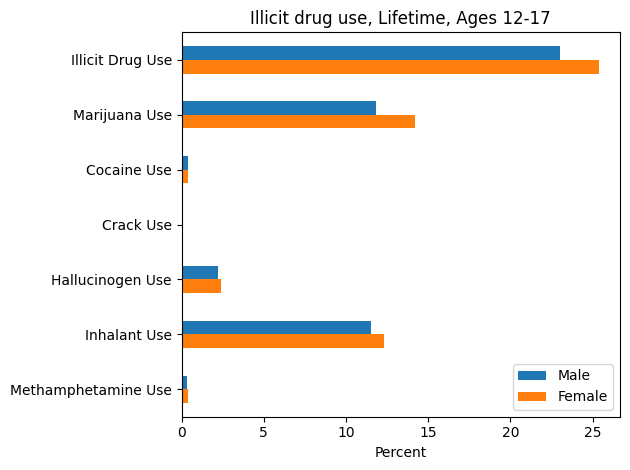

In [14]:
plot_use(tables_lifetime['Aged 12-17'], title='Illicit drug use, Lifetime, Ages 12-17')
plt.savefig('drug_use_lifetime_teen.png')

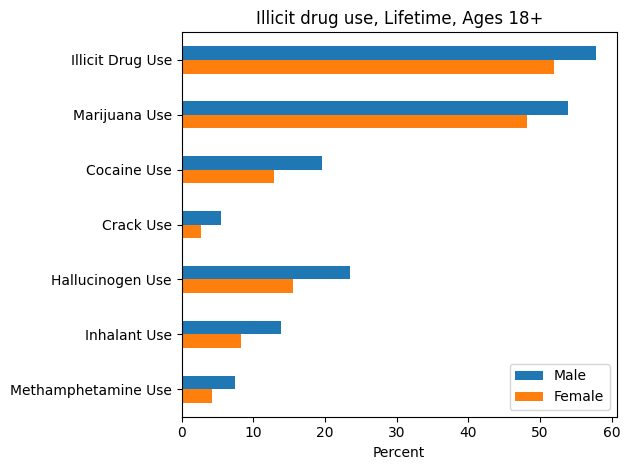

In [15]:
plot_use(tables_lifetime['Aged 18+'], title='Illicit drug use, Lifetime, Ages 18+')
plt.savefig('drug_use_lifetime_adult.png');

### Use in past year

In [17]:
tables = range(24, 61, 3)
tables_past_year = compile_tables(tables)

1.24B Past Year Illicit Drug Use
1.27B Past Year Marijuana Use
1.30B Past Year Cocaine Use
1.33B Past Year Crack Use
1.36B Past Year Hallucinogen Use
1.39B Past Year Inhalant Use
1.42B Past Year Methamphetamine Use
1.45B Past Year Misuse of Prescription Opioids
1.48B Past Year Misuse of Prescription Stimulants
1.51B Past Year Misuse of Prescription Tranquilizers or Prescription Sedatives
1.54B Past Year Misuse of Prescription Tranquilizers
1.57B Past Year Misuse of Prescription Sedatives
1.60B Past Year Misuse of Prescription Benzodiazepines


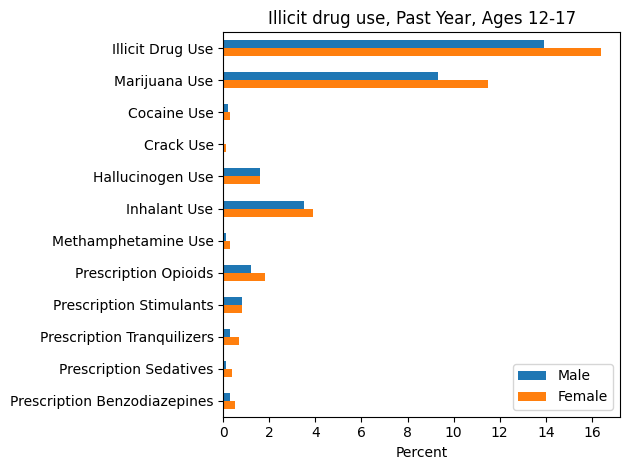

In [18]:
plot_use(tables_past_year['Aged 12-17'], title='Illicit drug use, Past Year, Ages 12-17')
plt.savefig('drug_use_year_teen.png')

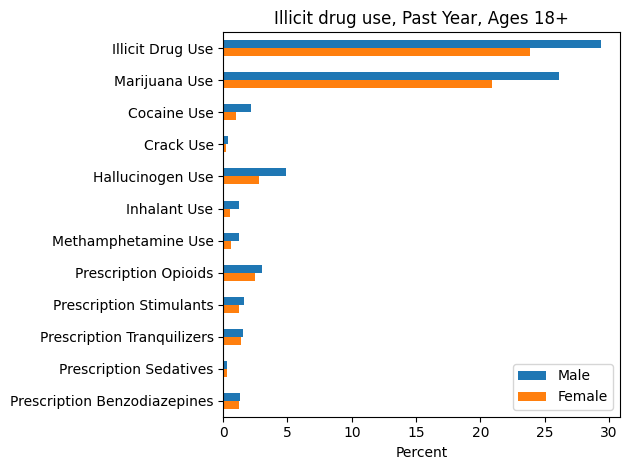

In [19]:
plot_use(tables_past_year['Aged 18+'], title='Illicit drug use, Past Year, Ages 18+')
plt.savefig('drug_use_year_adult.png');

### Use in past month

In [20]:
tables = range(25, 59, 3)
tables_past_month = compile_tables(tables)

1.25B Past Month Illicit Drug Use
1.28B Past Month Marijuana Use
1.31B Past Month Cocaine Use
1.34B Past Month Crack Use
1.37B Past Month Hallucinogen Use
1.40B Past Month Inhalant Use
1.43B Past Month Methamphetamine Use
1.46B Past Month Misuse of Prescription Opioids
1.49B Past Month Misuse of Prescription Stimulants
1.52B Past Month Misuse of Prescription Tranquilizers or Prescription Sedatives
1.55B Past Month Misuse of Prescription Tranquilizers
1.58B Past Month Misuse of Prescription Sedatives


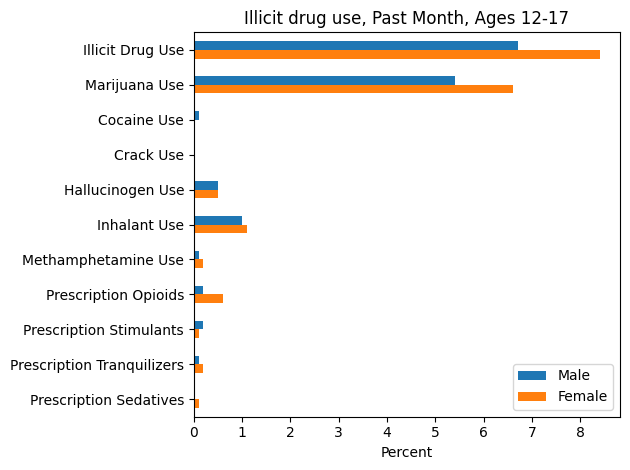

In [21]:
plot_use(tables_past_month['Aged 12-17'], title='Illicit drug use, Past Month, Ages 12-17')
plt.savefig('drug_use_month_teen.png')

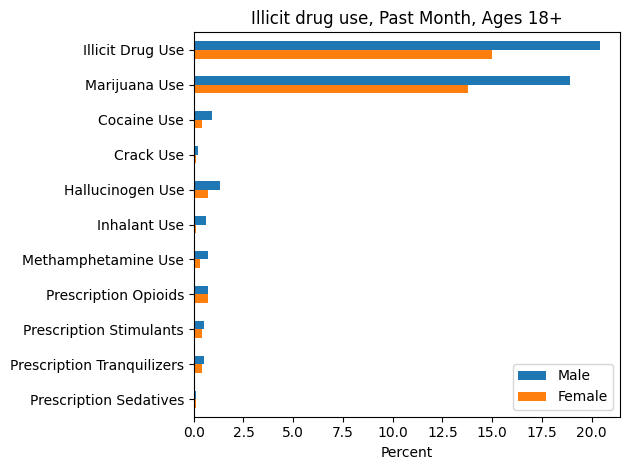

In [22]:
plot_use(tables_past_month['Aged 18+'], title='Illicit drug use, Past Month, Ages 18+')
plt.savefig('drug_use_month_adult.png');

In [37]:
tables_past_year

Aged 12-17        \
                                                              2023  2024   
                             Demographic Characteristic                    
Illicit Drug Use             Male                             13.1  13.9   
                             Female                           16.5  16.4   
Marijuana Use                Male                              9.7   9.3   
                             Female                           12.7  11.5   
Cocaine Use                  Male                              0.2   0.2   
                             Female                            0.3   0.3   
Crack Use                    Male                              NaN   NaN   
                             Female                            NaN   0.1   
Hallucinogen Use             Male                              1.7   1.6   
                             Female                            1.3   1.6   
Inhalant Use                 Male                              NaN   3.5   
                             Female                            NaN   3.9   
Methamphetamine Use          Male                              0.2   0.1   
                             Female                            0.2   0.3   
Prescription Opioids         Male                              1.6   1.2   
                             Female                            2.3   1.8   
Prescription Stimulants      Male                              0.8   0.8   
                             Female                            1.0   0.8   
Prescription Tranquilizers   Male                              0.3   0.3   
                             Female                            0.6   0.7   
Prescription Sedatives       Male                              0.2   0.1   
                             Female                            0.3   0.4   
Prescription Benzodiazepines Male                              0.3   0.3   
                             Female                            0.6   0.5   

                                                                    Aged 18+  \
                                                        Change Diff     2023   
                             Demographic Characteristic                        
Illicit Drug Use             Male                          0.8  NaN     28.6   
                             Female                       -0.1  2.5     23.4   
Marijuana Use                Male                         -0.4  NaN     25.4   
                             Female                       -1.2  2.2     20.4   
Cocaine Use                  Male                          0.0  NaN      2.5   
                             Female                        0.0  0.1      1.3   
Crack Use                    Male                          NaN  NaN      0.5   
                             Female                        NaN  NaN      0.3   
Hallucinogen Use             Male                         -0.1  NaN      4.0   
                             Female                        0.3  0.0      2.5   
Inhalant Use                 Male                          NaN  NaN      NaN   
                             Female                        NaN  0.4      NaN   
Methamphetamine Use          Male                         -0.1  NaN      1.3   
                             Female                        0.1  0.2      0.7   
Prescription Opioids         Male                         -0.4  NaN      3.2   
                             Female                       -0.5  0.6      2.8   
Prescription Stimulants      Male                          0.0  NaN      1.5   
                             Female                       -0.2  0.0      1.4   
Prescription Tranquilizers   Male                          0.0  NaN      1.5   
                             Female                        0.1  0.4      1.5   
Prescription Sedatives       Male                         -0.1  NaN      0.5   
                             Female                        0.1  0.3      0.3   
Pre

In [32]:
def plot_changes(table, **options):
    table['Change'].unstack(sort=False).plot(kind='barh')
    plt.gca().invert_yaxis()
    decorate(xlabel='Change in percentage points', loc='lower right', **options)

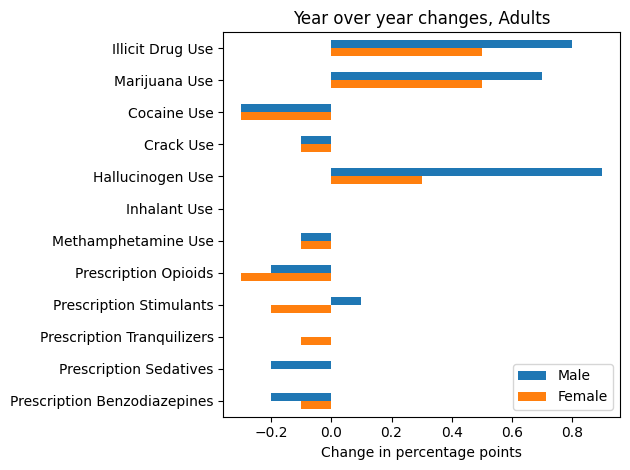

In [35]:
plot_changes(tables_past_year['Aged 18+'], title='Year over year changes, Adults')
plt.savefig('drug_use_changes_adult.png');

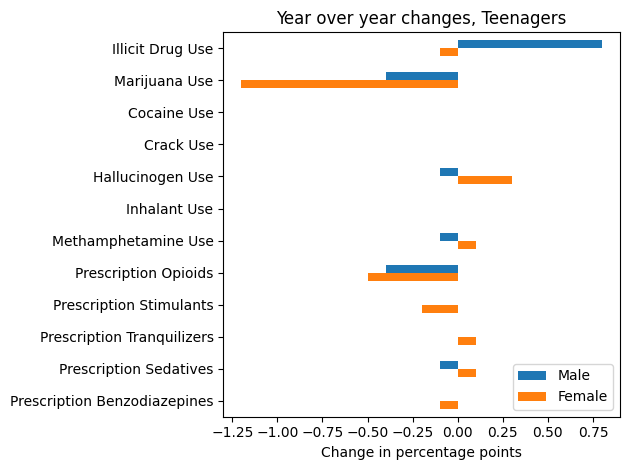

In [36]:
plot_changes(tables_past_year['Aged 12-17'], title='Year over year changes, Teenagers')
plt.savefig('drug_use_changes_teenager.png');